## Task

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report


In [4]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
df.shape

(150, 5)

In [11]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [12]:
pd.DataFrame({"Missing value (%)": df.isnull().sum()/len(df.index)*100})

,Missing value (%)
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0
Species,0.0


In [13]:
data=df.groupby('Species')
print(data)

In [14]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [15]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Data Visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x1b88a2ee980>,
 'caps': [<matplotlib.lines.Line2D at 0x1b88a2eeec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b88a2ee6e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b88a2ef400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b88a2ef6a0>],
 'means': []}

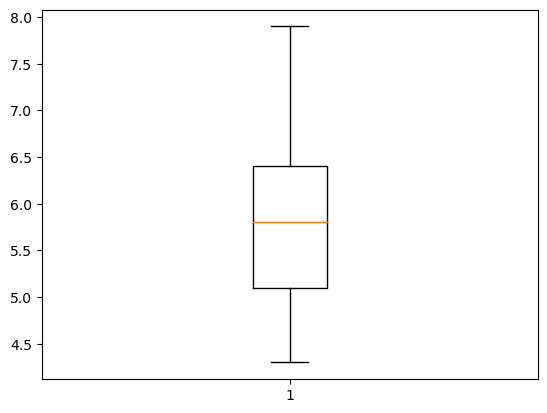

In [16]:
plt.boxplot(df['SepalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b88a4226e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b88a2efbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b88a422440>],
 'medians': [<matplotlib.lines.Line2D at 0x1b88a422c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b88a422ef0>],
 'means': []}

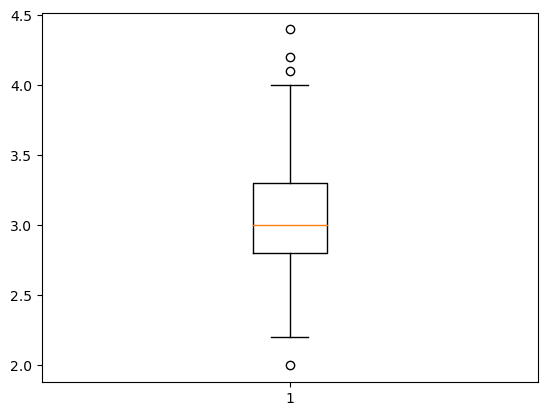

In [17]:
plt.boxplot(df['SepalWidthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b88a49cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b88a49d510>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b88a49cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1b88a49da50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b88a49dcf0>],
 'means': []}

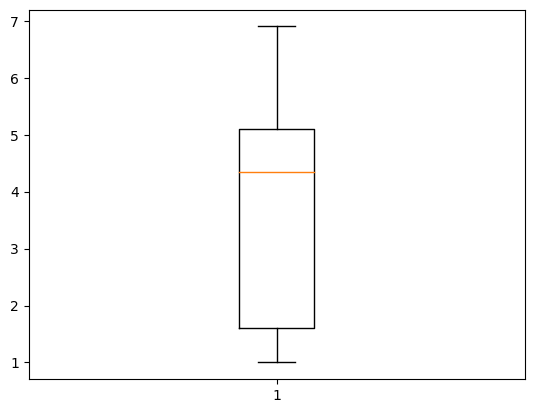

In [18]:
plt.boxplot(df['PetalLengthCm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b88ac00610>,
 'caps': [<matplotlib.lines.Line2D at 0x1b88ac00b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b88ac00370>],
 'medians': [<matplotlib.lines.Line2D at 0x1b88ac01090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b88a4c41f0>],
 'means': []}

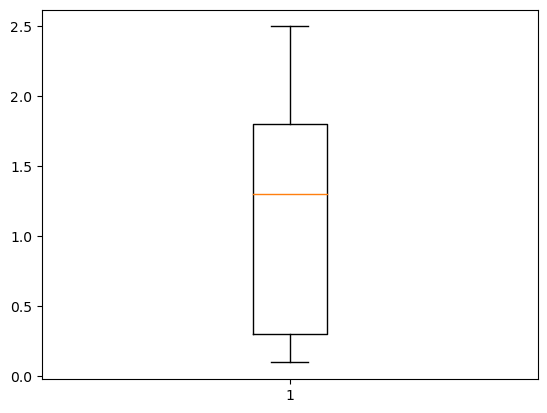

In [19]:
plt.boxplot(df['PetalWidthCm'])

<Axes: >

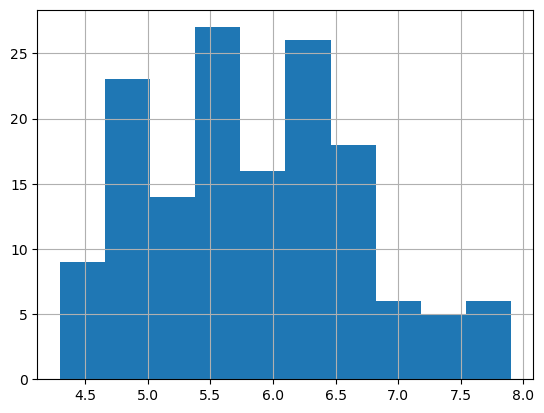

In [20]:
df['SepalLengthCm'].hist()

<Axes: >

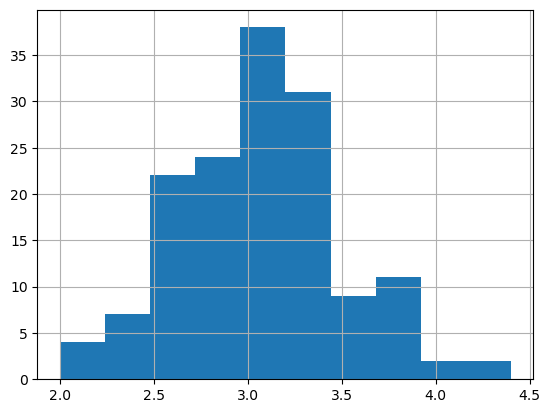

In [21]:
df['SepalWidthCm'].hist()

<Axes: >

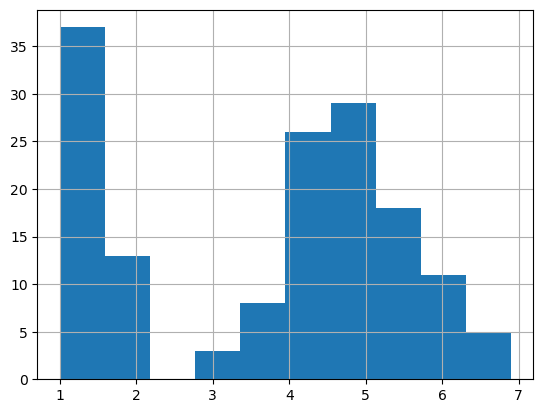

In [22]:
df['PetalLengthCm'].hist()

<Axes: >

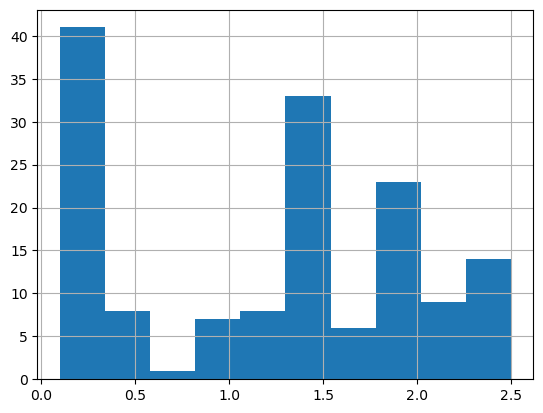

In [23]:
df['PetalWidthCm'].hist()

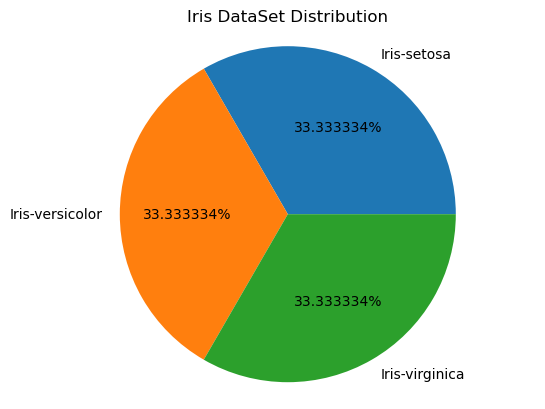

In [24]:
species_counts = df['Species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1f%%')
plt.axis('equal')
plt.title('Iris DataSet Distribution')
plt.show()

<Axes: >

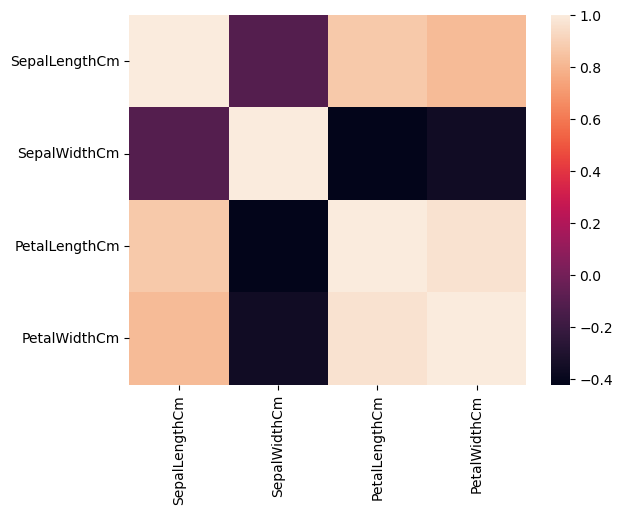

In [25]:
sns.heatmap(df.corr())

In [26]:
X=df.drop('Species',axis=1)
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [27]:
Y=df['Species']
print(Y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


## Train and Test Data

In [28]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.20, random_state=2)

In [29]:
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
classifier=LogisticRegression(multi_class='ovr', solver='lbfgs')
classifier.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr')

In [31]:
Y_pred=classifier.predict(X_test)

### Accuracy

In [32]:
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9


### Classification Report

In [33]:
class_report=classification_report(Y_test,Y_pred)
print(class_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.96        14
Iris-versicolor       0.86      0.75      0.80         8
 Iris-virginica       0.80      1.00      0.89         8

       accuracy                           0.90        30
      macro avg       0.89      0.89      0.88        30
   weighted avg       0.91      0.90      0.90        30

